## Dataframe Setup

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [116]:
dates = ['Intake_Date', 'Outcome_Date', 'DOB']
dtypes = {
    'Outcome_Type': 'category',
    'Intake_Age': 'object',
    'Outcome_Age': 'object',
    'Animal_Type': 'category',
    'Breed': 'object',
    'Primary_Color': 'category',
    'Secondary_Color': 'category',
    'Intake_Condition': 'category',
    'Intake_Type': 'category',
    'Sex': 'category',
    'Days_in_Shelter': 'float64',
    'Shelter_Name': 'object',
}

Long_Beach_Animal_Data = pd.read_csv('../Long_Beach/Long_Beach_Animal_Data.csv')
print("Long Beach Animals" , Long_Beach_Animal_Data.shape)
Sonoma_Animal_Data = pd.read_csv('../Sonoma/Sonoma_Animal_Data.csv')
print("Sonoma County Animals" , Sonoma_Animal_Data.shape)
Austin_Animal_Data = pd.read_csv('../Austin/Austin_Animal_Data.csv', dtype= dtypes, parse_dates=dates)
print("Austin Animals" , Austin_Animal_Data.shape)

animal_data = pd.concat([Long_Beach_Animal_Data, Austin_Animal_Data, Sonoma_Animal_Data])

animal_data = animal_data.astype(
        {
        'Outcome_Type' : 'category',
        'Intake_Type' : 'category',
        'Intake_Age' : 'float64',
        'Outcome_Age' : 'object',
        'Animal_Type' : 'category',
        'Breed' : 'object',
        'Primary_Color' : 'category',
        'Secondary_Color' : 'object',
        'Intake_Condition' : 'category',
        'Sex' : 'category',
        'Intake_Date' : 'datetime64[ns]',
        'Outcome_Date' : 'datetime64[ns]',
        'Days_in_Shelter' : 'object',
        'Shelter_Name' : 'object'
    }
)


Long Beach Animals (24718, 15)
Sonoma County Animals (18900, 15)
Austin Animals (77896, 15)


## Dataset Features Overview

In [117]:
print(f"Missing values:\n {animal_data.isna().sum()}\n")

print(f"\nDuplicated Values: {animal_data.duplicated().sum()}\n")
animal_data = animal_data.drop_duplicates()
print("\nDuplicated Values Dropped\n")
animal_data = animal_data.reset_index(drop=True)

print(f'Shape: {animal_data.shape}\n')

print(f"Unique Values\n {animal_data.nunique()}\n")

animal_data.describe()

Missing values:
 Animal_Type             0
DOB                     0
Primary_Color           0
Secondary_Color     58181
Sex                     0
Intake_Date             0
Intake_Condition        0
Intake_Type             0
Outcome_Date            0
Outcome_Type            0
Intake_Age              0
Outcome_Age             0
Days_in_Shelter         0
Breed                   0
Shelter_Name            0
dtype: int64


Duplicated Values: 0


Duplicated Values Dropped

Shape: (121514, 15)

Unique Values
 Animal_Type            13
DOB                 13294
Primary_Color         142
Secondary_Color       107
Sex                     9
Intake_Date         60584
Intake_Condition       30
Intake_Type            21
Outcome_Date        69012
Outcome_Type           31
Intake_Age           4231
Outcome_Age          4509
Days_in_Shelter       864
Breed                3104
Shelter_Name            3
dtype: int64



,Intake_Date,Outcome_Date,Intake_Age
count,121514,121514,121514.000000
mean,2017-04-12 20:25:45.914709504,2017-05-01 11:58:59.356617472,836.100268
min,2013-08-16 00:00:00,2013-10-01 10:39:00,-1336.000000
25%,2015-04-21 09:49:30,2015-05-07 00:00:00,2.000000
50%,2016-09-27 10:57:00,2016-10-19 11:42:30,270.000000
75%,2018-02-17 13:37:00,2018-03-02 00:00:00,1095.000000
max,2025-01-12 00:00:00,2025-01-13 00:00:00,10957.000000
std,NaN,NaN,1199.563544


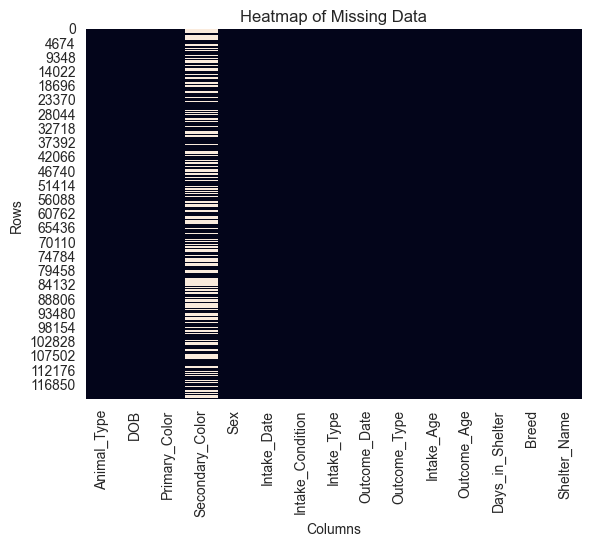

In [118]:
sns.heatmap(animal_data.isnull(), cbar=False)
plt.title("Heatmap of Missing Data")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

## Animal Type
Records are simplified and grouped into either Cat, Dog, or Other. <br>
Count-plot of Category Distribution.

In [119]:
def Simplify_Type(animal):
    map = {
        "Rabbit" : "Other",
        "Wild" : "Other",
        "Guinea Pig" : "Other",
        "Livestock" : "Other",
        "Bird" : "Other",
        "Reptile" : "Other"
    }
    return map.get(animal, animal.title())

animal_data['Animal_Type'] = animal_data['Animal_Type'].apply(Simplify_Type)

### Animal Type - Histogram

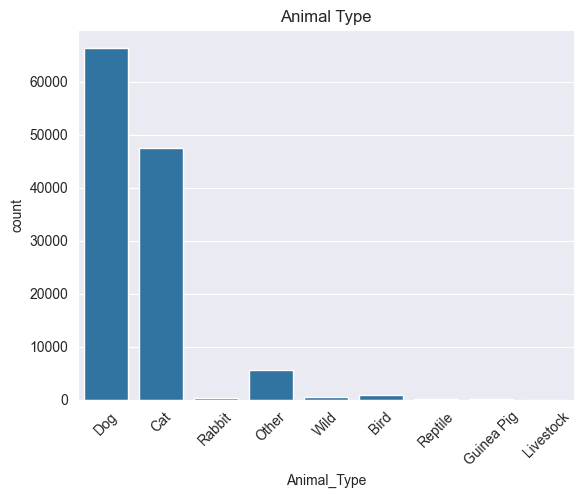

In [120]:
ax = sns.countplot(data=animal_data, x='Animal_Type')
ax.tick_params(axis='x', rotation=45)
ax.set_title("Animal Type")
plt.show()

## Intake & Outcome Age

Filtering of dates to only have non-negative datetime. <br>
Transformations to create a daily, monthly, and yearly age value. <br>
Also, standardizing the time format.

Long Beach, CA - 2017-01-01 -> 2025-01-13 <br>
Sonoma County, CA - 2013-08-16 -> 2023-09-23 <br>
Austin, TX - 2013-10-01 -> 2018-04-03

In [121]:
def Simplify_Datetime(text):
    if isinstance(text, str) and ' ' in text:
        num, time = text.split(" ")
        num = int(num)
        if time.lower() == 'days':
            return num
        if time.lower() == 'months':
            return int(round(num * 30.44))
        if time.lower() == 'years':
            return int(round(num * 365.25))
    elif isinstance(text, (int, float)):
        return float(text)
    return 0

animal_data['Outcome_Age_Days'] = animal_data['Outcome_Age'].apply(Simplify_Datetime)
animal_data['Outcome_Age_Days'] = animal_data['Outcome_Age_Days'].astype('float64')
animal_data['Intake_Age_Days'] = animal_data['Intake_Age'].apply(Simplify_Datetime)
animal_data['Intake_Age_Days'] = animal_data['Intake_Age_Days'].astype('float64')

animal_data = animal_data[(animal_data['Intake_Age_Days'] > 0) & (animal_data['Outcome_Age_Days'] > 0)]

animal_data['Outcome_Age_Years'] = animal_data['Outcome_Age_Days'].astype(int).apply(lambda x : round((x / 365.25), 1))
animal_data['Intake_Age_Years'] = animal_data['Intake_Age_Days'].astype(int).apply(lambda x : round((x /  365.25), 1))

### Animal Ages - Histograms

#### Animal Intake Age (Years)

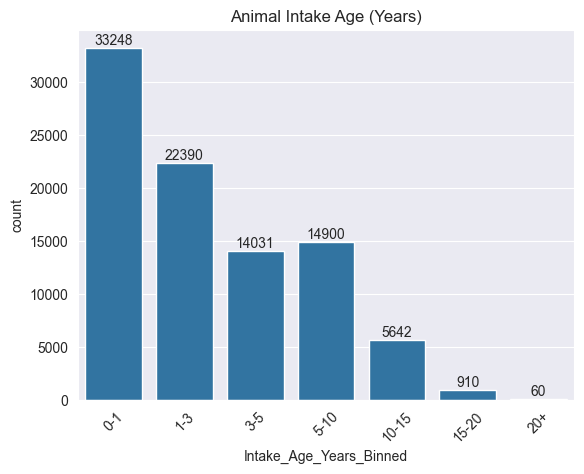

In [122]:
bins = [0, 1, 3, 5, 10, 15, 20, 100]
labels = ['0-1', '1-3', '3-5', '5-10', '10-15', '15-20', '20+']
animal_data['Intake_Age_Years_Binned'] = pd.cut(animal_data['Intake_Age_Years'], bins=bins, labels=labels, right=False)

ax = sns.countplot(data=animal_data, x='Intake_Age_Years_Binned')
ax.set_title("Animal Intake Age (Years)")
plt.xticks(rotation=45)

for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count}', (x, y), ha='center', va='bottom')

plt.show()

#### Animal Outcome Age (Years)

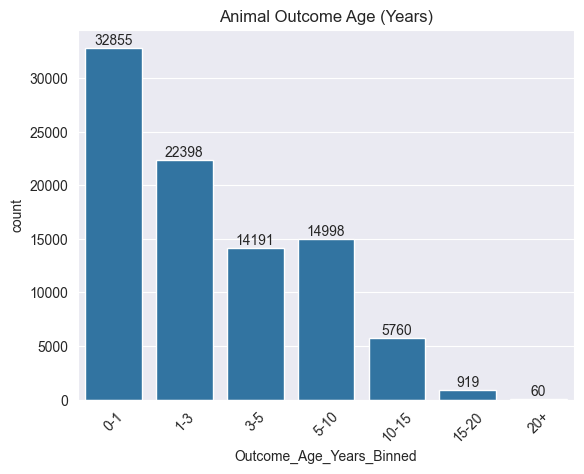

In [123]:
bins = [0, 1, 3, 5, 10, 15, 20, 100]
labels = ['0-1', '1-3', '3-5', '5-10', '10-15', '15-20', '20+']
animal_data['Outcome_Age_Years_Binned'] = pd.cut(animal_data['Outcome_Age_Years'], bins=bins, labels=labels, right=False)

ax = sns.countplot(data=animal_data, x='Outcome_Age_Years_Binned')
ax.set_title("Animal Outcome Age (Years)")
plt.xticks(rotation=45)

for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count}', (x, y), ha='center', va='bottom')

plt.show()

#### Intake by Year Visualizations

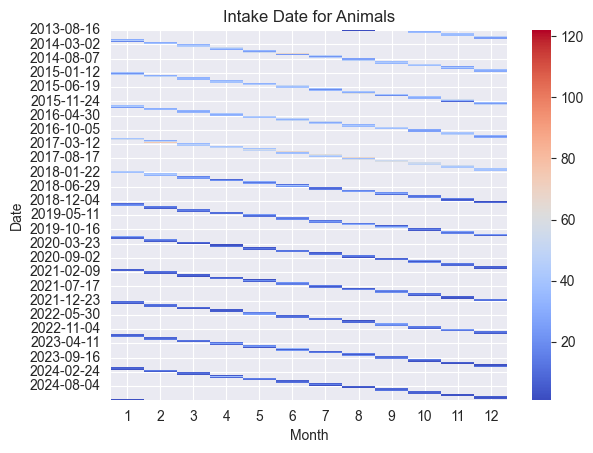

In [124]:
animal_data['Intake_Date_Available'] = animal_data['Intake_Date'].notnull()

heatmap_data = animal_data.pivot_table(
    index=animal_data['Intake_Date'].dt.date,
    columns=animal_data['Intake_Date'].dt.month,
    values='Intake_Date_Available',
    aggfunc='count'
)
animal_data.drop(columns='Intake_Date_Available')
sns.heatmap(heatmap_data, cmap="coolwarm", cbar=True)
plt.title("Intake Date for Animals")
plt.xlabel("Month")
plt.ylabel("Date")
plt.show()

#### Outcome Date by Year Visualization

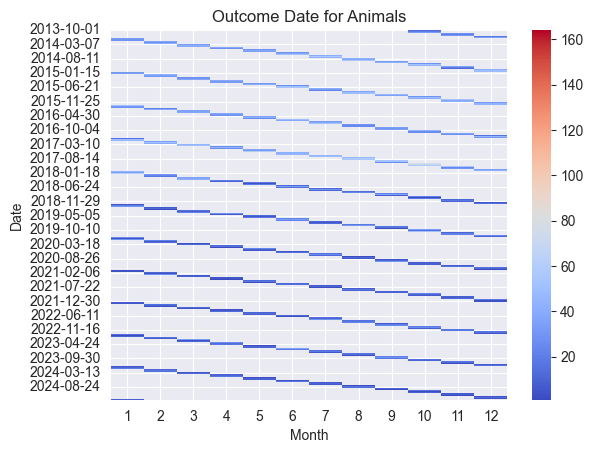

In [125]:
animal_data['Outcome_Date_Available'] = animal_data['Outcome_Date'].notnull()

heatmap_data = animal_data.pivot_table(
    index=animal_data['Outcome_Date'].dt.date,
    columns=animal_data['Outcome_Date'].dt.month,
    values='Outcome_Date_Available',
    aggfunc='count'
)
animal_data.drop(columns='Outcome_Date_Available')
sns.heatmap(heatmap_data, cmap="coolwarm", cbar=True)
plt.title("Outcome Date for Animals")
plt.xlabel("Month")
plt.ylabel("Date")
plt.show()

## Intake & Outcome Types
Filtering of Types to exclude outliers <br>
Transformations of existing categories to simple terms <br>

In [126]:
def Simplify_Intake_Type(intake):
    intakes = {
        "Transfer" : "Transfer/Return",
        "Return" : "Transfer/Return",
        "Adopted Animal Return" : "Transfer/Return",
        "Adoption Return" : "Transfer/Return",
        'Euthenasia Required' : "Euthanasia",
        "Euthanasia Request" : "Euthanasia",
        "Trap, Neuter, Return" : "Neuter",
        "Born Here" : "Stray",
        "Confiscate" : "Public Assist",
        "Welfare Seized" : "Public Assist",
        "Foster" : "Public Assist",
        "Wildlife" : "Public Assist",
        "Safe Keep" : "Public Assist"
    }

    return intakes.get(intake, intake).title()

animal_data = animal_data[(animal_data['Intake_Type'] != 'Os Appt')] # Filter
animal_data['Intake_Type'] = animal_data['Intake_Type'].apply(Simplify_Intake_Type)

In [127]:
def Simplify_Outcome_Type(outcome):
    outcomes = {
        "Disposal" : "Died",
        "Shelter, Neuter, Return" : "Neuter & Release",
        "Trap, Neuter, Release" : "Neuter & Release",
        "Rtos" : "Return To Owner",
        "Rto-Adopt" : "Return to Owner",
        "Missing" : "Missing/Escaped",
        "Escaped/Stolen" : "Missing/Escaped",
        "Euthanize" : "Euthanasia",
        "Homefirst" : "Adoption",
        "Community Cat" : "Adoption",
        "Foster To Adopt" : "Transfer",
        "Transport" : "Transfer",
        "Rescue" : "Transfer",
        "Return To Rescue" : "Transfer",
        "Foster" : "Transfer",
        "Relocate" : "Transfer"
    }
    return outcomes.get(outcome,outcome).title()


animal_data = animal_data[~animal_data['Outcome_Type'].isin(['Duplicate', 'Return To Wild Habitat', 'Unknown'])] # Filter
animal_data['Outcome_Type'] = animal_data['Outcome_Type'].apply(Simplify_Outcome_Type)

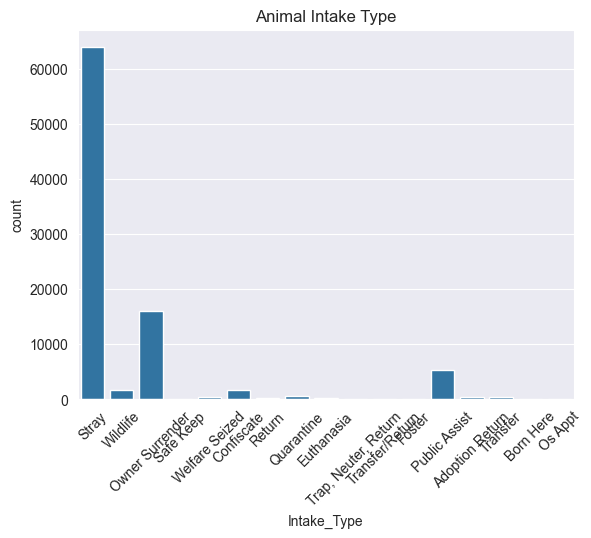

In [128]:
ax = sns.countplot(data=animal_data, x='Intake_Type')
ax.set_title("Animal Intake Type")
ax.tick_params(axis='x', rotation=45)
plt.show()

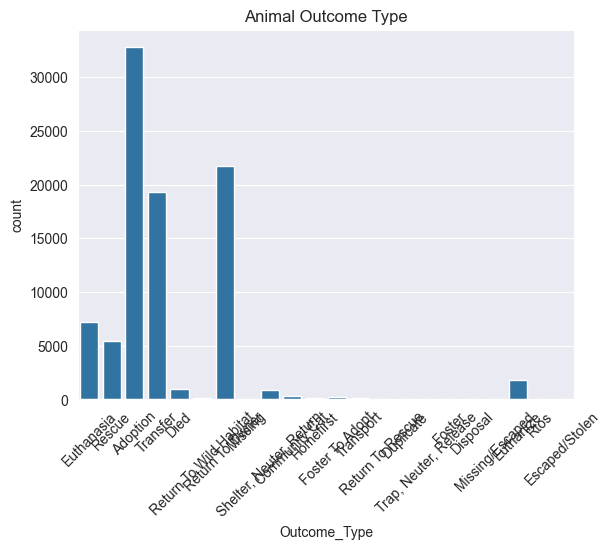

In [129]:
ax = sns.countplot(data=animal_data, x='Outcome_Type')
ax.set_title("Animal Outcome Type")
ax.tick_params(axis='x', rotation=45)
plt.show()

## Intake Condition
Filtering of Types to exclude outliers <br>
Transformations of existing categories to simple terms <br>


In [130]:
def Simplify_Intake_Condtion(condition):
    conditions = {
        "Pregnant" : "Pregnant/Nursing",
        "Nursing" : "Pregnant/Nursing",
        "Injured" : "Injured/Sick",
        "Sick" : "Injured/Sick",
        "Treatable/Rehab" : "Injured/Sick",
        "Treatable/Manageable" : "Injured/Sick",
        "Ill Mild" : "Injured/Sick", 
        "Ill Moderatete" : "Injured/Sick",
        "Ill Severe" : "Injured/Sick",
        "Injured Mild" : "Injured/Sick",
        "Injured  Mild" : "Injured/Sick",
        "Injured Modereate" : "Injured/Sick",
        "Injured  Modereate" : "Injured/Sick",
        "Injured  Moderate" : "Injured/Sick",
        "Injured Severe" : "Injured/Sick",
        "Injured  Severe" : "Injured/Sick",
        "Underage/Weight" : "Injured/Sick",
        "Intakeexam" : "Injured/Sick",
        "Welfare Seizures" : "Injured/Sick",
        "I/I Report" : "Injured/Sick",
        "Untreatable" : "Injured/Sick",
        "Aged" : "Healthy",
        "Behavior  Moderate" : "Healthy",
        "Behavior  Severe" : "Healthy",
        "Behavior  Mild" : "Healthy",
        "Fractious" : "Healthy",
        "Normal" : "Healthy",
        "Feral" : "Other",
        'Under Age/Weight' : "Injured/Sick"
    }
    return conditions.get(condition,condition).title()

animal_data['Intake_Condition'] = animal_data['Intake_Condition'].apply(Simplify_Intake_Condtion)

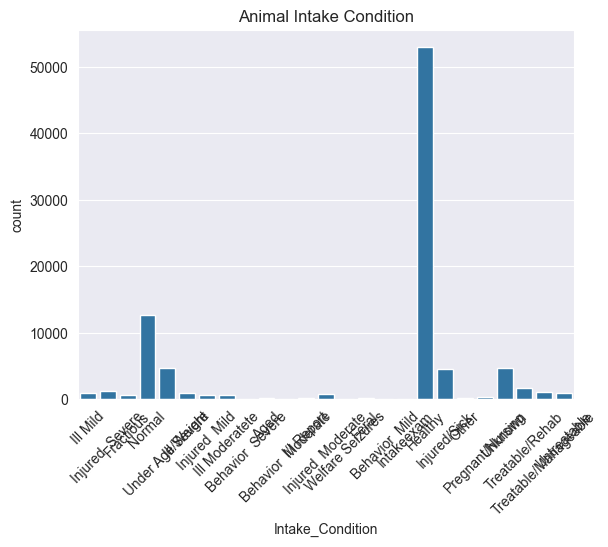

In [131]:
ax = sns.countplot(data=animal_data, x='Intake_Condition')
ax.set_title("Animal Intake Condition")
ax.tick_params(axis='x', rotation=45)
plt.show()

## Breed
Transformations of existing categories to simpler

In [132]:
def Simplify_Breed(animal):
    abbreviations = {
        "Retr": "Retriever",
        "Pinsch": "Pinscher",
        "Terr": "Terrier",
        "Pbgv": "Petit Basset Griffon Vendéen",
        "Germ Shepherd" : "German Shepherd",
        "Domestic Sh" : "Domestic Shorthair",
        'Chihuahua Sh' : 'Chihuahua Shorthair',
        "Labrador Retr" : "Labrador Retriever",
        "Lab" : "Labrador Retriever",
        "Labrador" : "Labrador Retriever",
        "Domestic Mh" : "Domestic Medium Hair",
        "Domestic Lh" : "Domestic Long Hair",
        "Domestic Longhair" : "Domestic Long Hair",
        'Yorkshire Terri' : 'Yorkshire Terrier',
        'Yorkshire Terr' : 'Yorkshire Terrier',
        'Fox Terr Wire' : 'Wire Hair Fox Terrier',
        'Tibetan Terr' : 'Tibetan Terrier',
        'Scottish Terr' : 'Scottish Terrier',
        'Airedale Terr' : 'Airedale Terrier',
        'Manchester Terr' : 'Manchester Terrier',
        'Fox Terr Smooth' :  'Smooth Fox Terrier',
        'Aust Terrier' : "Australian Terrier",
        'Sc Wheat Terr' : 'Soft Coated Wheaten Terrier',
        'Mex Hairless' : 'Mexican Hairless',
        'Eng Pointer' : 'English Pointer',
        'Poodle Toy' : 'Toy Poodle',
        'Poodle Min' : 'Miniature Poodle',
        'Poodle Stnd' : 'Standard Poodle',
        'Border Collie X' : 'Border Collie',
        'Exotic Sh' : "Exotic Shorthair",
        "Munchkin Sh" :"Munchkin Shorthair",
        "Germ Sh Point" : "German Shorthair Pointer",
        "British Sh" : "British Shorthair",
        'Oldeng Sheepdog' : "Old English Sheepdog",
        'Aust Shepherd' : "Australian Shepherd",
        'Aust Cattle Dog' : 'Australian Cattle Dog',
        'Aust Kelpie' : "Australian Kelpie",
        'Germ Wh Point' : 'German Wirehaired Pointer',
        'Bedlington Terr' : "Bedlington Terrier",
        'Patterdale Terr' : "Patterdale Terrier",
        'Sealyham Terr' : "Sealyham Terrier",
        'Chihuahua X' : 'Chihuahua',
        'Chihuahua Lh' : 'Chihuahua Longhair',
        'Min Pinscher' : 'Miniature Pinscher',
        'Welsh Corgi Pem' : 'Pembroke Welsh Corgi',
        'Welsh Corgi Car' : 'Cardigan Welsh Corgi',
        'Dachshund Wh' : 'Dachshund Wirehair',
        'Dachshund Lh' : 'Dachshund Longhair',
        'Dachshund Stan' : 'Dachshund',
        'Eng Coonhound' : 'English Coonhound',
        'Ital Greyhound' : 'Italian Greyhound',
        'Amer Foxhound' : 'American Foxhound',
        'Scot Deerhound' : "Scottish Deerhound",
        'Tr Walker Hound' : 'Treeing Walker Coonhound',
        'Norw Elkhound' : 'Norwegian Elkhound',
        'Eng Foxhound' : 'English Foxhound',
        'Lop-Amer Fuzzy' : 'American Fuzzy Lop',
        'Amer Bulldog' : "American Bulldog",
        'Pitt Bull' : 'Pit Bull',
        'Am Pit Bull Ter' : 'American Pit Bull Terrier',
        'Chesa Bay Retr': 'Chesa Bay Retriever',
        'Golden Retr' : 'Golden Retriever',
        'Schnauzer Min' : 'Miniature Schnauzer',
        'Cocker Span' : 'Cocker Spaniel',
        'Eng Sprngr Span' : 'English Springer Spaniel',
        'Tibetan Span' : 'Tibetan Spaniel',
        'Clumber Span' : 'Clumber Spaniel',
        'Sussex Span' : 'Sussex Spaniel',
        'Boykin Span' : 'Boykin Spaniel',
        'Eng Toy Spanel' : 'English Toy Spaniel',
        'Flat Coat Retr' : 'Flat Coat Retriever',
        'Cavalier Span' : "Cavalier Spaniel",
        'American Staff' : 'American Staffordshire Terrier',
        'Amer Eskimo' : 'American Eskimo',
        'Chinchilla-Amer' : 'Chinchilla-American',
        'Eng Bulldog' : 'English Bulldog',
        'Old Eng Bulldog' : 'Old English Bulldog',
        'Eng Setter' : 'English Setter',
        'Eng Toy Spaniel' : 'English Toy Spaniel',
        'Queensland Hell' : 'Queensland Heller'
    }
    if animal is not None:
        animal = animal.replace("Mix", "").strip()
        return abbreviations.get(animal, animal).title()
    else:
        return None

animal_data[['Primary_Breed', 'Secondary_Breed', 'Tertiary_Breed']] = animal_data['Breed'].str.split(r"[&/]+", expand=True)
animal_data[['Secondary_Breed','Tertiary_Breed']] = animal_data[['Secondary_Breed','Tertiary_Breed']].fillna('None')

In [133]:

import re
from rapidfuzz import process, fuzz

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def find_best_match_with_tokens(breed_name, standard_list, min_score=80):
    # Clean the input breed name
    cleaned_breed = clean_text(breed_name)

    if not cleaned_breed:
        return breed_name

    # Split into tokens and check if any token matches a standard breed
    tokens = cleaned_breed.split()

    # Check for direct matches with standard breeds
    for standard_breed in standard_list:
        std_clean = clean_text(standard_breed)

        # Primary breed is often the first word
        if tokens[0] == std_clean or tokens[0] in std_clean:
            return standard_breed

        # Check if standard breed appears in the full name
        if std_clean in cleaned_breed:
            return standard_breed

    # Fall back to fuzzy matching if no direct token match
    matches = process.extractOne(
        cleaned_breed,
        standard_list,
        scorer=fuzz.token_sort_ratio
    )

    if matches and matches[1] >= min_score:
        return matches[0]

    return breed_name


In [136]:
animal_data['Primary_Breed'] = animal_data['Primary_Breed'].apply(clean_text)
animal_data['Secondary_Breed'] = animal_data['Secondary_Breed'].apply(clean_text)
animal_data['Tertiary_Breed'] = animal_data['Tertiary_Breed'].apply(clean_text)

standard_breeds_df = pd.read_csv('data/dog_breeds/Dog_Breeds.csv')

standard_breeds = standard_breeds_df['Breed Name'].to_list()

animal_data['Primary_Breed'] = animal_data['Primary_Breed'].apply(
    lambda x: find_best_match_with_tokens(x, standard_breeds)
)
animal_data['Secondary_Breed'] = animal_data['Secondary_Breed'].apply(
    lambda x: find_best_match_with_tokens(x, standard_breeds)
)
animal_data['Tertiary_Breed'] = animal_data['Tertiary_Breed'].apply(
    lambda x: find_best_match_with_tokens(x, standard_breeds)
)

#animal_data['Primary_Breed'] = animal_data['Primary_Breed'].apply(Simplify_Breed)
#animal_data['Secondary_Breed'] = animal_data['Secondary_Breed'].apply(Simplify_Breed)
#animal_data['Tertiary_Breed'] = animal_data['Tertiary_Breed'].apply(Simplify_Breed)

In [107]:
print(animal_data[['Breed','Primary_Breed']].sample(50))

                                         Breed             Primary_Breed
84654                  Chihuahua Shorthair Mix   chihuahua shorthair mix
110071                                PIT BULL                  pit bull
21714                                  Unknown                   unknown
14829                                  Unknown                   unknown
21355                                  Unknown                   unknown
30440                   Domestic Shorthair Mix    domestic shorthair mix
8555                                   Unknown                   unknown
78014                 Domestic Medium Hair Mix  domestic medium hair mix
67421   Chihuahua Shorthair/Manchester Terrier       chihuahua shorthair
109150                       GERM SHEPHERD/MIX       German Shepherd Dog
117943                                PIT BULL                  pit bull
60270                      Chihuahua Shorthair       chihuahua shorthair
51940                     Jack Russell Terrier     

In [108]:
print(animal_data[['Breed','Secondary_Breed']].sample(50))

                                      Breed       Secondary_Breed
62750                Domestic Shorthair Mix                  None
85612                 Queensland Heeler Mix                  None
674                                 Unknown                  None
92353                      Pit Bull/Pointer               Pointer
38941    French Bulldog/Chihuahua Shorthair   Chihuahua Shorthair
35538         Dachshund/Chihuahua Shorthair   Chihuahua Shorthair
46882                                 Boxer                  None
62894             Black Mouth Cur/Catahoula             Catahoula
105502                        LABRADOR RETR                  None
109419                          DOMESTIC SH                  None
62635                Domestic Shorthair Mix                  None
110703               PARSON RUSS TER/BEAGLE                BEAGLE
9734                                Unknown                  None
95053                Domestic Shorthair Mix                  None
119396    

In [109]:
print(animal_data[['Breed','Tertiary_Breed']].sample(50))

                                          Breed Tertiary_Breed
28555   Dachshund Longhair/Cardigan Welsh Corgi           None
31639              German Shorthair Pointer Mix           None
92171                    Labrador Retriever Mix           None
44414                       Anatol Shepherd Mix           None
94783                         Cairn Terrier Mix           None
74555                                Beagle Mix           None
16835                                   Unknown           None
40508                         Cairn Terrier Mix           None
95298                               Siamese Mix           None
49981                              Pit Bull Mix           None
44590                          Carolina Dog Mix           None
46245                    Domestic Shorthair Mix           None
23284                                   Unknown           None
22179                                   Unknown           None
4975                                    Unknown        

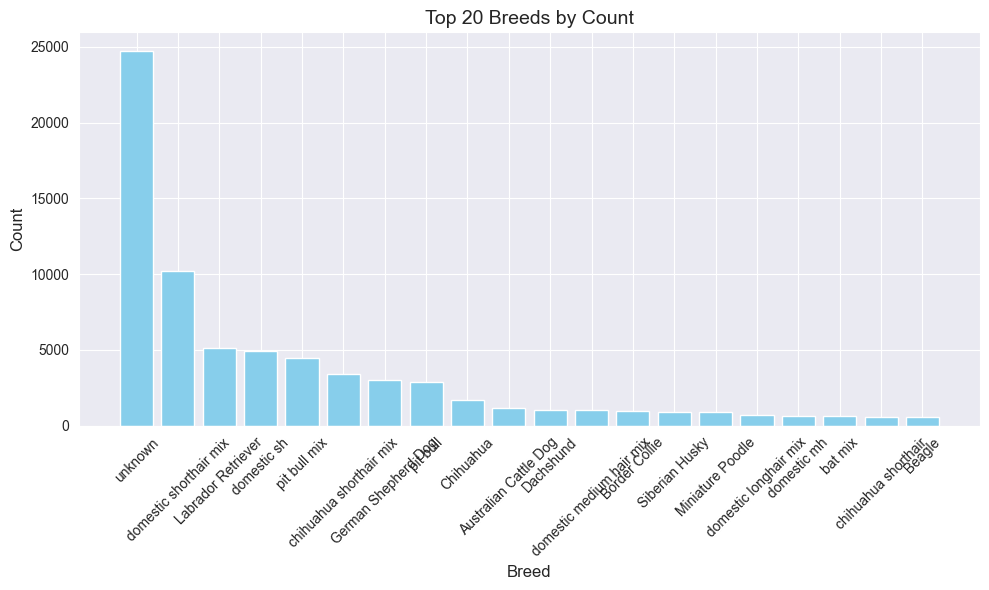

Index(['Cane Corso', 'am pit bull ter', 'west highland mix', 'akita mix',
       'chicken mix', 'cavalier span', 'manx', 'Scottish terrier',
       'Silky Terrier', 'English Setter', 'himalayan mix', 'collie smooth',
       'blue lacy', 'American Foxhound', 'collie rough', 'Airedale Terrier',
       'collie rough mix', 'fox mix', 'American English Coonhound',
       'Beauceron', 'rat', 'Bernese Mountain Dog', 'Irish terrier', 'snowshoe',
       'English Foxhound', 'American Hairless Terrier', 'rex', 'persian',
       'queensland heeler', 'californian', 'Samoyed', 'persian mix',
       'cavalier span mix', 'lopmini', 'Newfoundland', 'chicken',
       'hamster mix', 'Dogue de Bordeaux', 'ragdoll mix', 'dutch', 'pbgv mix',
       'skunk', 'st bernard rough coat', 'Schipperke', 'Chinese Crested',
       'st bernard rough coat mix', 'hamster', 'Leonberger', 'feist mix',
       'st bernard smooth coat mix'],
      dtype='object', name='Primary_Breed')


In [110]:
filtered_df = animal_data[animal_data['Primary_Breed'] != 'Unknown']
breed_count = filtered_df['Primary_Breed'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(x=breed_count.index[:20], height=breed_count.values[:20], color='skyblue')
plt.title('Top 20 Breeds by Count', fontsize=14)
plt.xlabel('Breed', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(breed_count.index[150:200])

## Sex
Filtering of Types to exclude outliers <br>
Transformations of existing categories to simplify terms <br>

In [111]:
def Simplify_Sex(animal):
    map = {
        "Female" : "Intact Female",
        "Male" : "Intact Male",
        "Spayed" : "Spayed Female",
        "Neutered" : "Neutered Male"
    }
    return map.get(animal, animal)

animal_data['Sex'] = animal_data["Sex"].apply(Simplify_Sex)

animal_data['Sex'].value_counts()

Sex
Neutered Male    23436
Intact Male      22019
Spayed Female    20107
Intact Female    19903
Unknown           5710
Name: count, dtype: int64

## Days in Shelter

Transformations of existing categories to have one formatted date


In [112]:
def Simplify_Days_In_Shelter(date):
    if isinstance(date, str) and ' ' in date:
        num, _ = date.split(' ')
        return int(num)

animal_data['Days_in_Shelter'] = animal_data['Days_in_Shelter'].apply(Simplify_Days_In_Shelter)

In [113]:
animal_data.to_excel('Animal_Adoptions.xlsx')

In [114]:
animal_data['Primary_Breed'].sample(50)

104348               domestic sh
42289     domestic shorthair mix
103510               domestic sh
74648         Labrador Retriever
93845               pit bull mix
73309                   Shih Tzu
5744                     unknown
27012     domestic shorthair mix
104104               domestic sh
105181    Parson Russell Terrier
22798                    unknown
26072     domestic shorthair mix
21066                    unknown
121205                 Chihuahua
62522     domestic shorthair mix
36895        chihuahua shorthair
106542                   Maltese
95964     domestic shorthair mix
72239                  Pekingese
35437     domestic shorthair mix
1826                     unknown
98934     domestic shorthair mix
115649                 Chihuahua
83376           collie rough mix
22433                    unknown
63260        German Shepherd Dog
120643               domestic sh
90480         Labrador Retriever
26418                   pit bull
117255        Labrador Retriever
61899     

In [ ]:
def Simplify_Datetime(text):
    if isinstance(text, str) and ' ' in text:
        num, time = text.split(" ")
        num = int(num)
        if time.lower() == 'days':
            return num
        if time.lower() == 'months':
            return int(round(num * 30.44))
        if time.lower() == 'years':
            return int(round(num * 365.25))
    elif isinstance(text, (int, float)):
        return float(text)
    return 0

animal_data['Outcome_Age_Days'] = animal_data['Outcome_Age'].apply(Simplify_Datetime)
animal_data['Intake_Age_Days'] = animal_data['Intake_Age'].apply(Simplify_Datetime)

animal_data['Outcome_Age_Years'] = animal_data['Outcome_Age_Days'].astype(int).apply(lambda x : round((x / 365.25), 1))
animal_data['Intake_Age_Years'] = animal_data['Intake_Age_Days'].astype(int).apply(lambda x : round((x /  365.25), 1))

bins = [0, 1, 3, 5, 10, 15, 20]
labels = ['0-1', '1-3', '3-5', '5-10', '10-15', '15-20']
animal_data['Outcome_Age_Years_Binned'] = pd.cut(animal_data['Outcome_Age_Years'], bins=bins, labels=labels, right=False)

ax = sns.countplot(data=animal_data, x='Outcome_Age_Years_Binned')
ax.set_title("Animal Outcome Age (Years)")
plt.xticks(rotation=45)
plt.show()